In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
train_values = pd.read_csv('train_values.csv')
train_labels = pd.read_csv('train_labels.csv')

In [175]:
train_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [176]:
train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [177]:
#Cual fue la regiòn de level 1 màs dañada?
train_values_with_damage = train_values.merge(train_labels,how='inner')
train_values_with_damage.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [178]:
#Cual fue la regiòn de level 1 mas dañada?
train_values_by_geo_level_one = train_values_with_damage.filter(items=['building_id','geo_level_1_id','damage_grade'])
train_values_by_geo_level_one.head()

,building_id,geo_level_1_id,damage_grade
0,802906,6,3
1,28830,8,2
2,94947,21,3
3,590882,22,2
4,201944,11,3


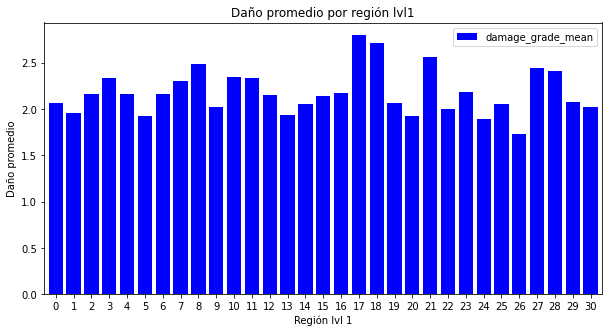

In [179]:
#Daño por region de level uno
train_values_by_geo_level_one=train_values_by_geo_level_one.filter(items=[
    'geo_level_1_id','damage_grade']).groupby(['geo_level_1_id']).agg('mean').reset_index()
train_values_by_geo_level_one=train_values_by_geo_level_one.rename(columns={'damage_grade':'damage_grade_mean'})
g = train_values_by_geo_level_one.plot.bar\
(x='geo_level_1_id', y='damage_grade_mean', rot=0,width=0.8,figsize=(10,5),color='blue',title='Daño promedio por región lvl1',xlabel='Región lvl 1',ylabel='Daño promedio')


In [180]:
#Cual fue la regiòn de level 1 màs dañada?
train_values_by_geo_level_one.loc[train_values_by_geo_level_one[
   'damage_grade_mean']==train_values_by_geo_level_one['damage_grade_mean'].max()]

,geo_level_1_id,damage_grade_mean
17,17,2.79448


In [181]:
#Cual fue la regiòn de level 1 menos dañada?
train_values_by_geo_level_one.loc[train_values_by_geo_level_one[
   'damage_grade_mean']==train_values_by_geo_level_one['damage_grade_mean'].min()]

,geo_level_1_id,damage_grade_mean
26,26,1.730887


In [182]:
#promedio de daño por antiguedad de edificaciòn
train_values_by_age = train_values_with_damage.filter(items=['age','damage_grade'])
train_values_by_age=train_values_by_age.groupby('age').agg('mean').reset_index()
train_values_by_age = train_values_by_age.rename(columns={'damage_grade':'damage_grade_mean'})
train_values_by_age.head()

,age,damage_grade_mean
0,0,1.957529
1,5,2.103481
2,10,2.200689
3,15,2.263455
4,20,2.300510


Text(0, 0.5, 'Daño promedio')

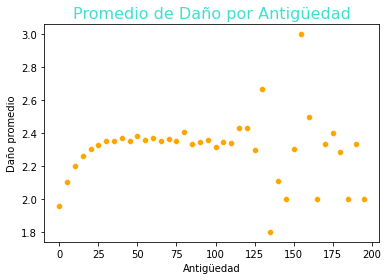

In [183]:
#eliminamos la edad de 995 para que se aprecie mejor la gràfica
train_values_by_age=train_values_by_age.head(40)
g= sns.scatterplot(x='age',y='damage_grade_mean',data=train_values_by_age,color='orange')
g.set_title('Promedio de Daño por Antigüedad',fontsize=16,color='turquoise')
g.set_xlabel('Antigüedad')
g.set_ylabel('Daño promedio')

In [184]:
#Promedio de daño por geo lvl1 y condicion de la superficie terrestre
train_values_with_damage.filter(items=['geo_level_1_id','damage_grade','land_surface_condition'])\
.groupby(['geo_level_1_id','land_surface_condition']).agg('mean')\
.pivot_table(columns='geo_level_1_id',index='land_surface_condition',values='damage_grade')

geo_level_1_id,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
land_surface_condition,,,,,,,,,,,,,,,,,,,,,
n,2.077106,1.965241,2.194313,2.300417,2.140884,1.946731,2.242649,2.239782,2.494286,2.190164,...,2.635159,2.094017,2.101449,1.900901,2.102230,1.832685,2.469341,2.166667,2.076923,2.056338
o,2.072165,2.021739,2.500000,2.478261,2.162903,2.107527,2.211405,2.325540,2.465213,2.148148,...,2.619048,2.084507,2.155556,1.821053,2.139303,1.751491,2.533133,2.000000,2.117647,2.065693
t,2.061533,1.958790,2.147887,2.332888,2.166813,1.906593,2.147810,2.306131,2.484436,2.010281,...,2.556700,1.985385,2.200426,1.900302,2.038187,1.716969,2.441033,2.424000,2.076433,2.010363


In [193]:
train_values_with_damage_material=train_values_with_damage.filter(items=['damage_grade','has_superstructure_adobe_mud',\
'has_superstructure_rc_engineered']).groupby(['has_superstructure_adobe_mud',\
'has_superstructure_rc_engineered']).agg('mean')
train_values_with_damage_material

damage_grade
has_superstructure_adobe_mud has_superstructure_rc_engineered              
0                            0                                     2.242754
                             1                                     1.373265
1                            0                                     2.347476
                             1                                     1.730769

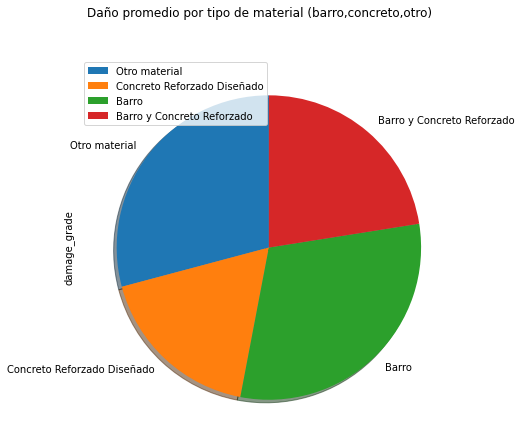

In [323]:
#Daño promedio por tipo de material (barro,concreto,otro)
g =train_values_with_damage_material['damage_grade'].plot(kind='pie', subplots=True,\
shadow = True,startangle=90,figsize=(10,7),labels=['Otro material','Concreto Reforzado Diseñado',\
'Barro','Barro y Concreto Reforzado'],title='Daño promedio por tipo de material (barro,concreto,otro)')
plt.legend(loc=2)

In [268]:
#Cantidad de familias que quedaron sin hogar. (Consideramos serious damage como hogar destruido)
train_values_with_damage.loc[damage_families['damage_grade']==3,['count_families']].sum()

count_families    87834
dtype: int64

In [274]:
#cantidad de familias por tipo de daño
cantidad_de_familias_por_daño=train_values_with_damage.filter(items=['damage_grade',\
'count_families']).groupby('damage_grade').agg('sum')
cantidad_de_familias_por_daño

,count_families
damage_grade,
1,22991
2,145593
3,87834


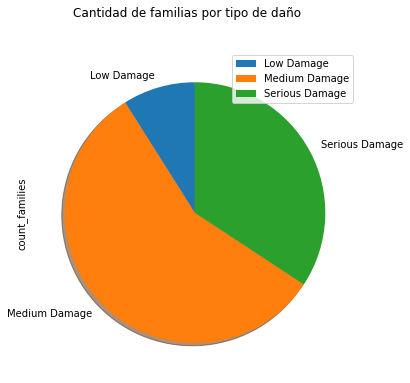

In [302]:
cantidad_de_familias_por_daño['count_families'].plot(kind='pie', subplots=True, \
shadow = True,startangle=90,figsize=(9,6),title='Cantidad de familias por tipo de daño',\
labels=['Low Damage','Medium Damage','Serious Damage'])
plt.legend(loc=1)